In [1]:
# Bibliotecas básicas para análisis y manipulación de datos  
import pandas as pd              
import numpy as np                

# Bibliotecas para visualización  
import matplotlib.pyplot as plt   
import seaborn as sns              

# Bibliotecas para el modelado  
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression    
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix   
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import chi2
 
import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Cargar el dataset del Titanic  
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Verificar las primeras filas del DataFrame  
print(titanic_data.head())  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Verificar la información general del DataFrame  
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Estadísticas descriptivas del dataset  
print(titanic_data.describe(include='all'))   

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [6]:
# Comprobar valores nulos en cada columna  
print(titanic_data.isnull().sum())  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


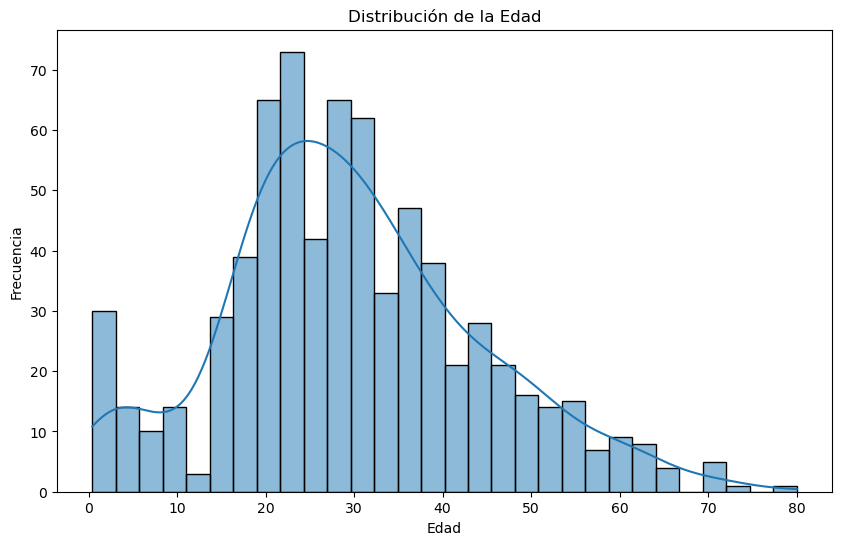

In [7]:
# Gráfico de la distribución de la edad  
plt.figure(figsize=(10, 6))  
sns.histplot(titanic_data['Age'], bins=30, kde=True)  
plt.title('Distribución de la Edad')  
plt.xlabel('Edad')  
plt.ylabel('Frecuencia')  
plt.show() 

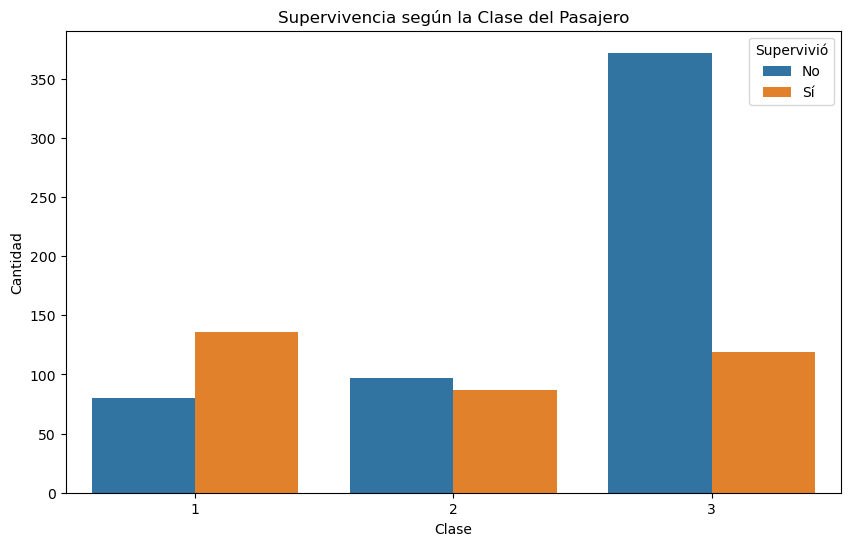

In [8]:
# Gráfico de la relación entre clase y supervivencia  
plt.figure(figsize=(10, 6))  
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)  
plt.title('Supervivencia según la Clase del Pasajero')  
plt.xlabel('Clase')  
plt.ylabel('Cantidad')  
plt.legend(title='Supervivió', labels=['No', 'Sí'])  
plt.show() 

In [9]:
# Eliminar filas con valores nulos  
titanic_data_cleaned = titanic_data.dropna()

In [10]:
# Mostrar las primeras filas del nuevo DataFrame  
print(titanic_data_cleaned.head())  

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


In [11]:
# Verificar el número de filas y columnas  
print(titanic_data_cleaned.shape)  

(183, 12)


In [12]:
# Comprobar si existen valores nulos  
print(titanic_data_cleaned.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
# Verificar las primeras filas del DataFrame limpio  
print(titanic_data_cleaned.head())  

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


In [14]:
# Convertir 'Sex' a formato numérico (0 para male, 1 para female)  
titanic_data_cleaned['Sex'] = titanic_data_cleaned['Sex'].map({'male': 0, 'female': 1}) 

In [15]:
# Convertir 'Embarked' a variables dummy  
titanic_data_cleaned = pd.get_dummies(titanic_data_cleaned, columns=['Embarked'], drop_first=True)

In [16]:
# Rellenar 'Fare' con la mediana  
titanic_data_cleaned['Fare'].fillna(titanic_data_cleaned['Fare'].median(), inplace=True)

In [17]:
# Verificar el DataFrame limpio y transformado  
print(titanic_data_cleaned.head())  
print(titanic_data_cleaned.info())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                             McCarthy, Mr. Timothy J    0  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                           Bonnell, Miss. Elizabeth    1  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked_Q  Embarked_S  
1       0  PC 17599  71.2833   C85       False       False  
3       0    113803  53.1000  C123       False        True  
6       0     17463  51.8625   E46       False        True  
10      1   PP 9549  16.7000    G6       False        True  
11      0    113783  

In [18]:
# Rellenar 'Fare' con la mediana   
titanic_data_cleaned['Fare'].fillna(titanic_data_cleaned['Fare'].median(), inplace=True)  

# Comprobar si aún hay valores nulos  
print(titanic_data_cleaned.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [19]:
# Verificar las columnas del DataFrame limpio  
print(titanic_data_cleaned.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [20]:
# Ver las columnas del DataFrame limpio  
print(titanic_data_cleaned.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [21]:
# Seleccionar solo columnas numéricas  
numeric_data = titanic_data_cleaned.select_dtypes(include=['float64', 'int64'])  

# Calcular la matriz de correlación  
correlation_matrix = numeric_data.corr()

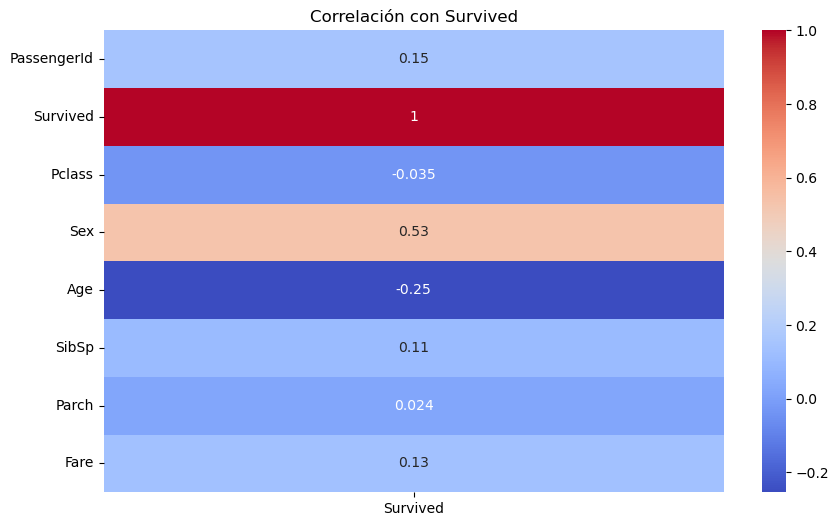

In [22]:
# Visualizar la correlación con respecto a 'Survived'  
plt.figure(figsize=(10, 6))  
sns.heatmap(correlation_matrix[['Survived']], annot=True, cmap='coolwarm')  
plt.title('Correlación con Survived')  
plt.show()

In [23]:
# Definir las características (X) y el objetivo (y)  
X = titanic_data_cleaned[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]  
y = titanic_data_cleaned['Survived']

In [25]:
# Selección de las mejores características  
selector = SelectKBest(score_func=chi2, k='all')  
selector.fit(X, y)  

# Mostrar los resultados  
scores = selector.scores_  
features = X.columns  
feature_scores = pd.DataFrame({"Feature": features, "Score": scores})  
print(feature_scores.sort_values(by="Score", ascending=False))

      Feature       Score
5        Fare  242.972795
2         Age   80.604591
1         Sex   26.929545
3       SibSp    1.838795
7  Embarked_S    0.615685
6  Embarked_Q    0.268902
4       Parch    0.121236
0      Pclass    0.048383


In [26]:
# Definir las características (X) y el objetivo (y)  
X = titanic_data_cleaned[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]  
y = titanic_data_cleaned['Survived']  

# Dividir el dataset en train y test  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Comprobar las dimensiones  
print("Dimensiones de X_train:", X_train.shape)  
print("Dimensiones de X_test:", X_test.shape)  
print("Dimensiones de y_train:", y_train.shape)  
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (146, 8)
Dimensiones de X_test: (37, 8)
Dimensiones de y_train: (146,)
Dimensiones de y_test: (37,)


In [28]:
# Crear el clasificador  
model = LogisticRegression(max_iter=200)  

# Entrenar el modelo  
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [29]:
y_pred = model.predict(X_test)


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7567567567567568


In [31]:
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.77      0.87      0.82        23

    accuracy                           0.76        37
   macro avg       0.75      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37

Matriz de confusión:
 [[ 8  6]
 [ 3 20]]


In [32]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [33]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
print("Resultados de evaluación en el conjunto de prueba:")
print(f"Precisión: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Resultados de evaluación en el conjunto de prueba:
Precisión: 0.76
Precisión: 0.77
Recall: 0.87
F1-score: 0.82


In [35]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

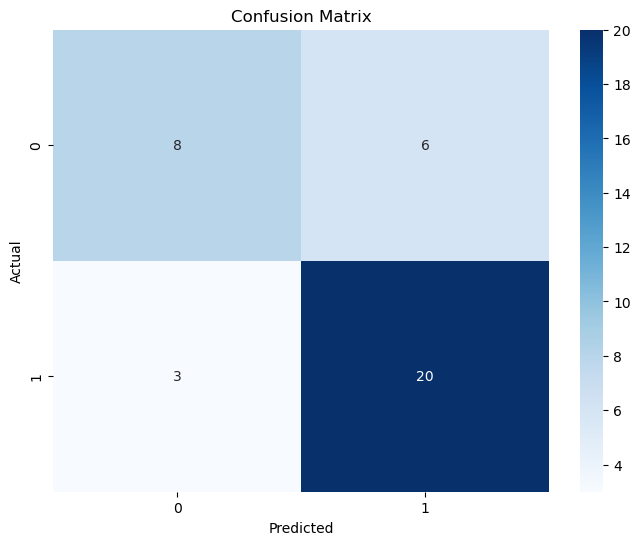

In [36]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7567567567567568
Precision: 0.7692307692307693
Recall: 0.8695652173913043
F1-score: 0.8163265306122449


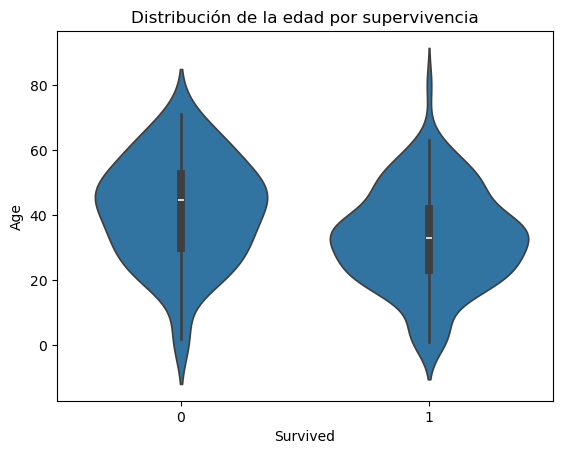

In [38]:
sns.violinplot(x="Survived", y="Age", data=titanic_data_cleaned)
plt.title("Distribución de la edad por supervivencia")
plt.show()

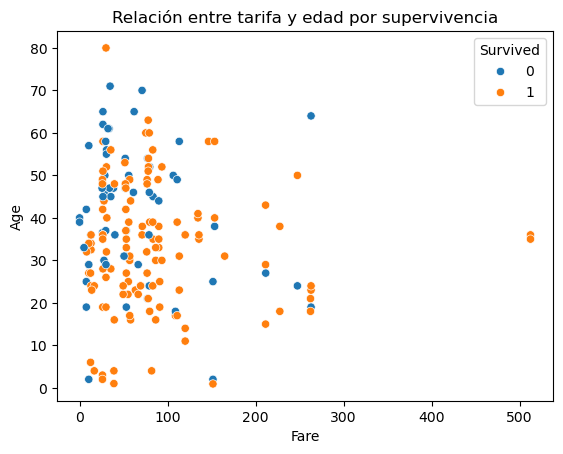

In [39]:
sns.scatterplot(x="Fare", y="Age", hue="Survived", data=titanic_data_cleaned)
plt.title("Relación entre tarifa y edad por supervivencia")
plt.show()

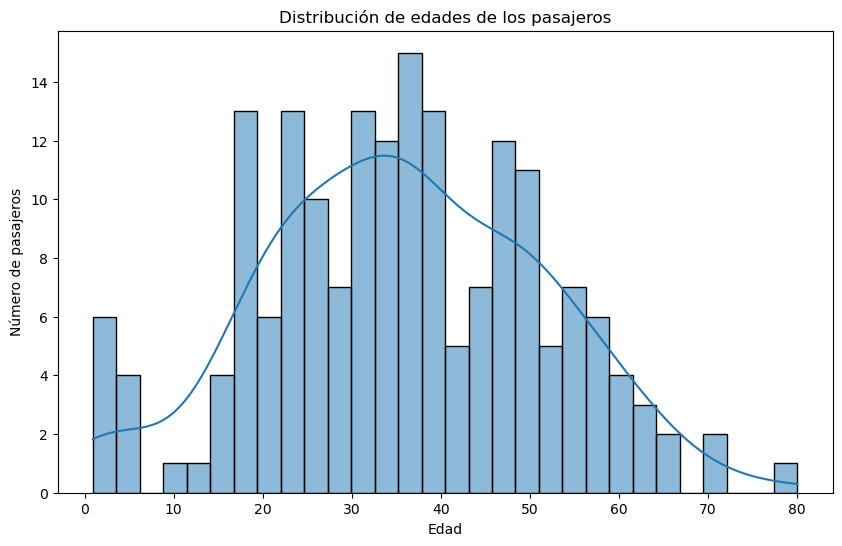

In [40]:
# Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data_cleaned, x="Age", bins=30, kde=True)
plt.title("Distribución de edades de los pasajeros")
plt.xlabel("Edad")
plt.ylabel("Número de pasajeros")
plt.show()

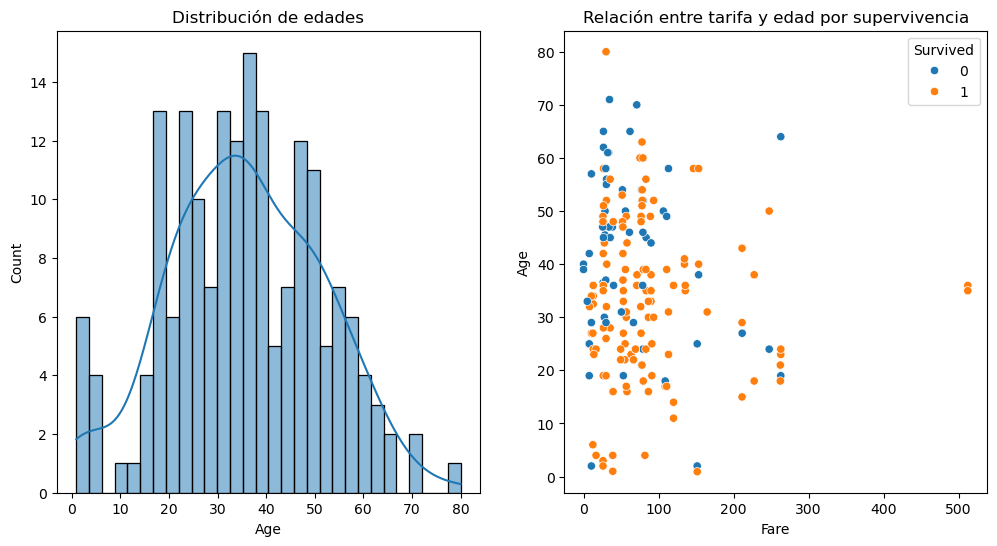

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histograma en el primer subplot
sns.histplot(data=titanic_data_cleaned, x="Age", bins=30, kde=True, ax=ax1)
ax1.set_title("Distribución de edades")

# Gráfico de dispersión en el segundo subplot
sns.scatterplot(x="Fare", y="Age", hue="Survived", data=titanic_data_cleaned, ax=ax2)
ax2.set_title("Relación entre tarifa y edad por supervivencia")

plt.show()